**Arboles de decisión**

 **Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#Cargamos el dadtaset y mostramos las 5 primeras filas
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario**

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características**

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

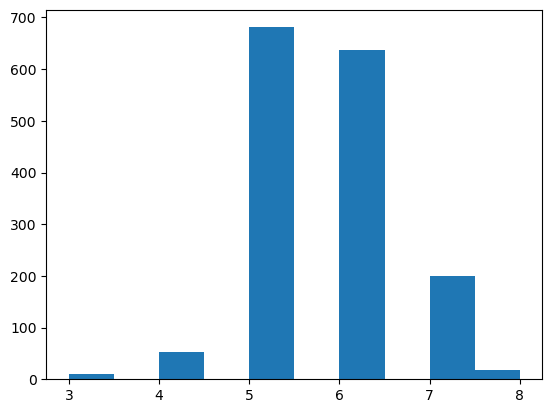

In [6]:
plt.hist(data.quality)

<Axes: xlabel='residual sugar', ylabel='alcohol'>

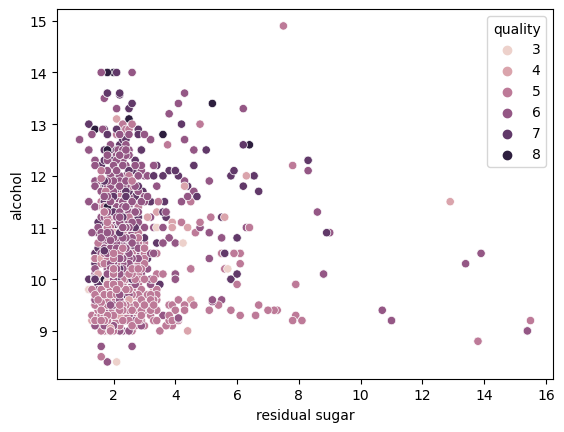

In [7]:
sns.scatterplot(x = "residual sugar", y = "alcohol", hue = "quality", data = data)

In [8]:
data['quality_category'] = data['quality'].apply(lambda x:  "poor" if x <5 else ("high" if x>7 else "medium"))
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,medium


In [9]:
data.quality_category = data.quality_category.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_category      1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<function matplotlib.pyplot.show(close=None, block=None)>

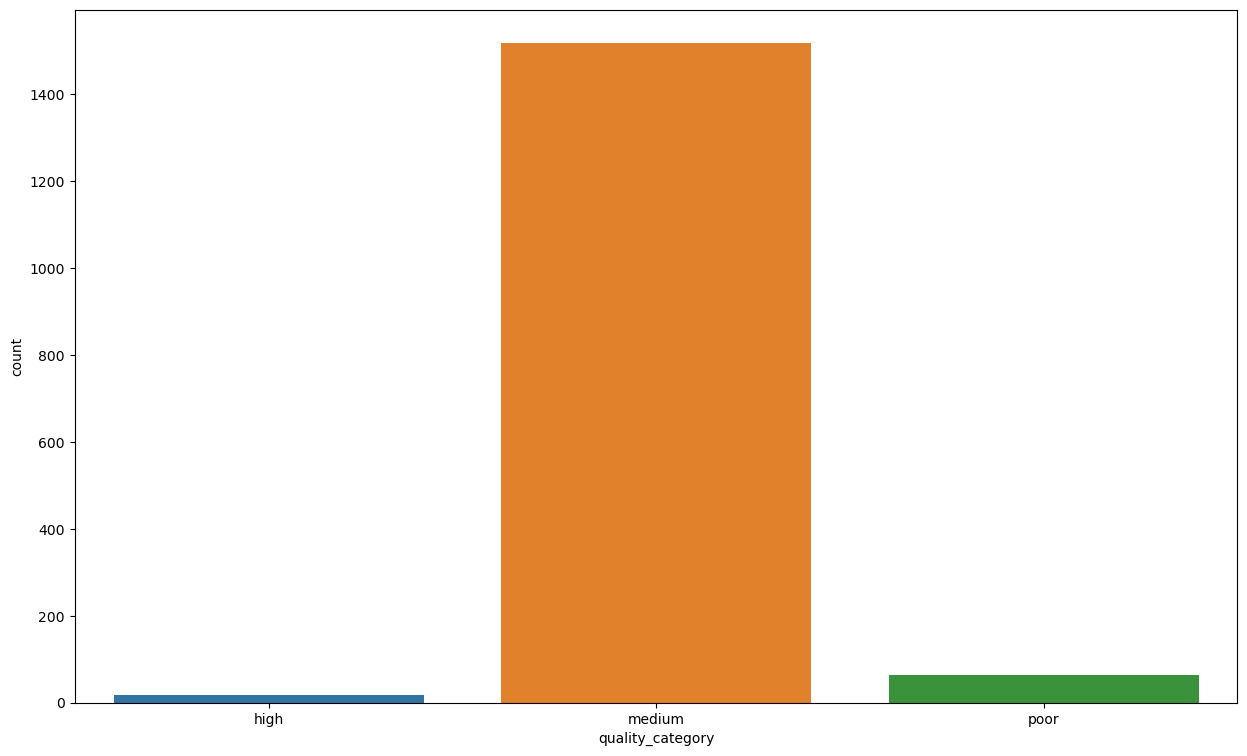

In [10]:
plt.figure(figsize=(15,9))
sns.countplot(data=data,x='quality_category')
plt.show

<Axes: xlabel='residual sugar', ylabel='alcohol'>

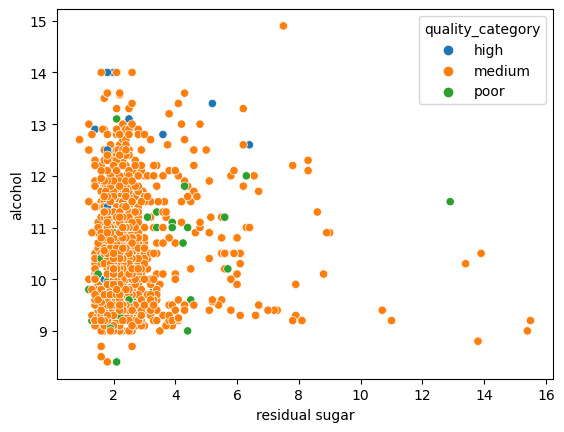

In [11]:
sns.scatterplot(data = data, x = 'residual sugar', y = 'alcohol',hue = "quality_category")

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

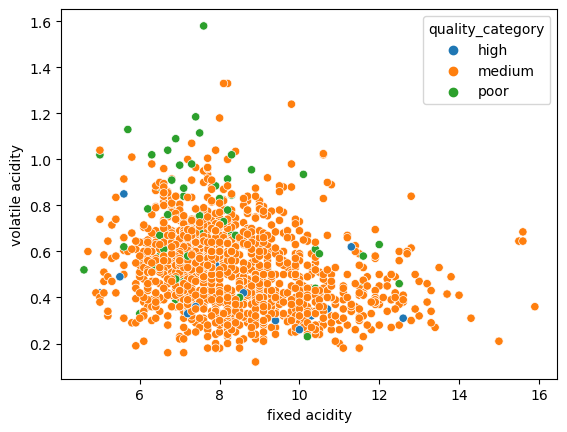

In [12]:
sns.scatterplot(data = data, x = 'fixed acidity', y = 'volatile acidity',hue="quality_category")

C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


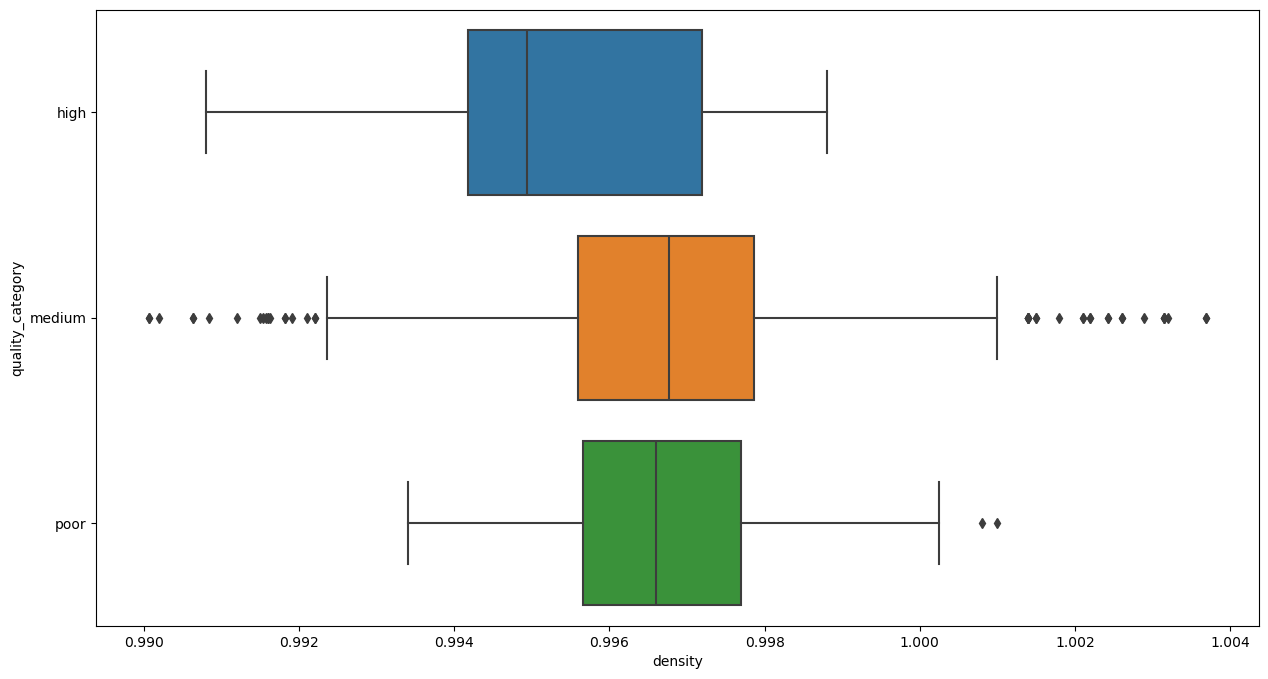

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x = 'density', y = 'quality_category', data = data)
plt.show()

C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


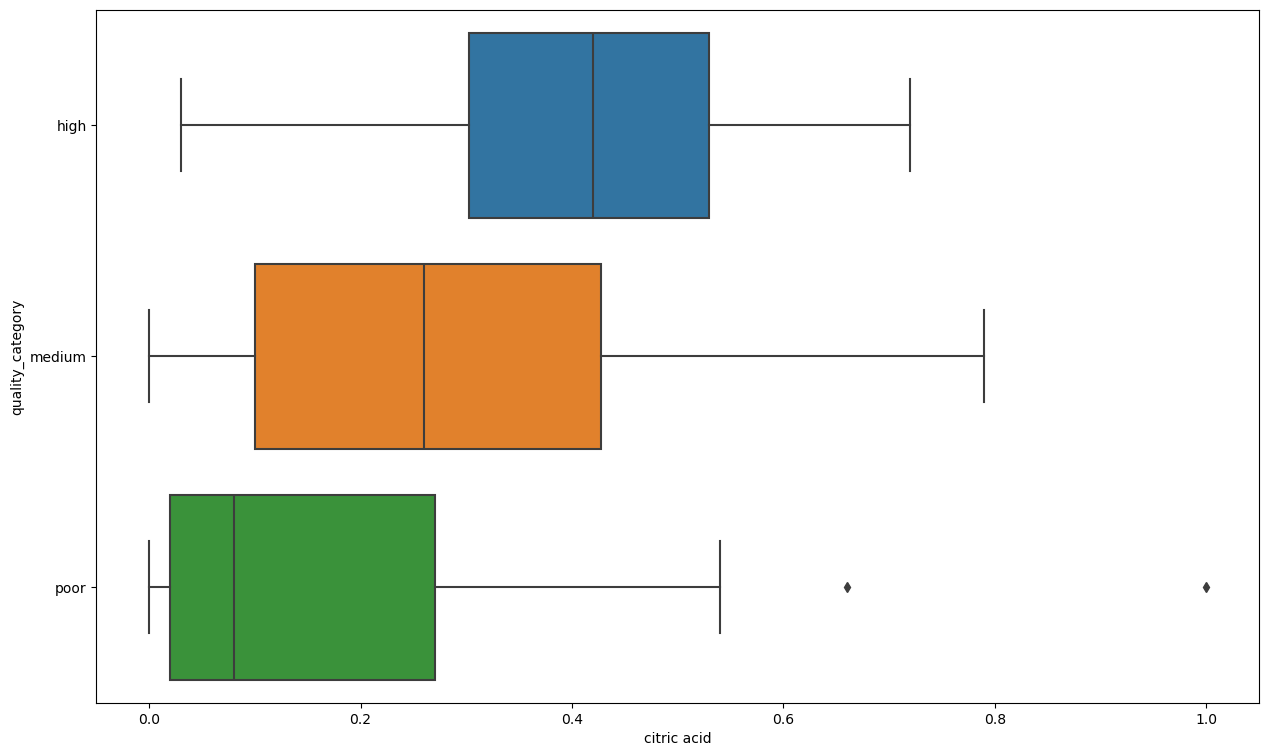

In [14]:
plt.figure(figsize=(15,9))
sns.boxplot(y = 'quality_category', x = 'citric acid', data = data)

plt.show()

C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


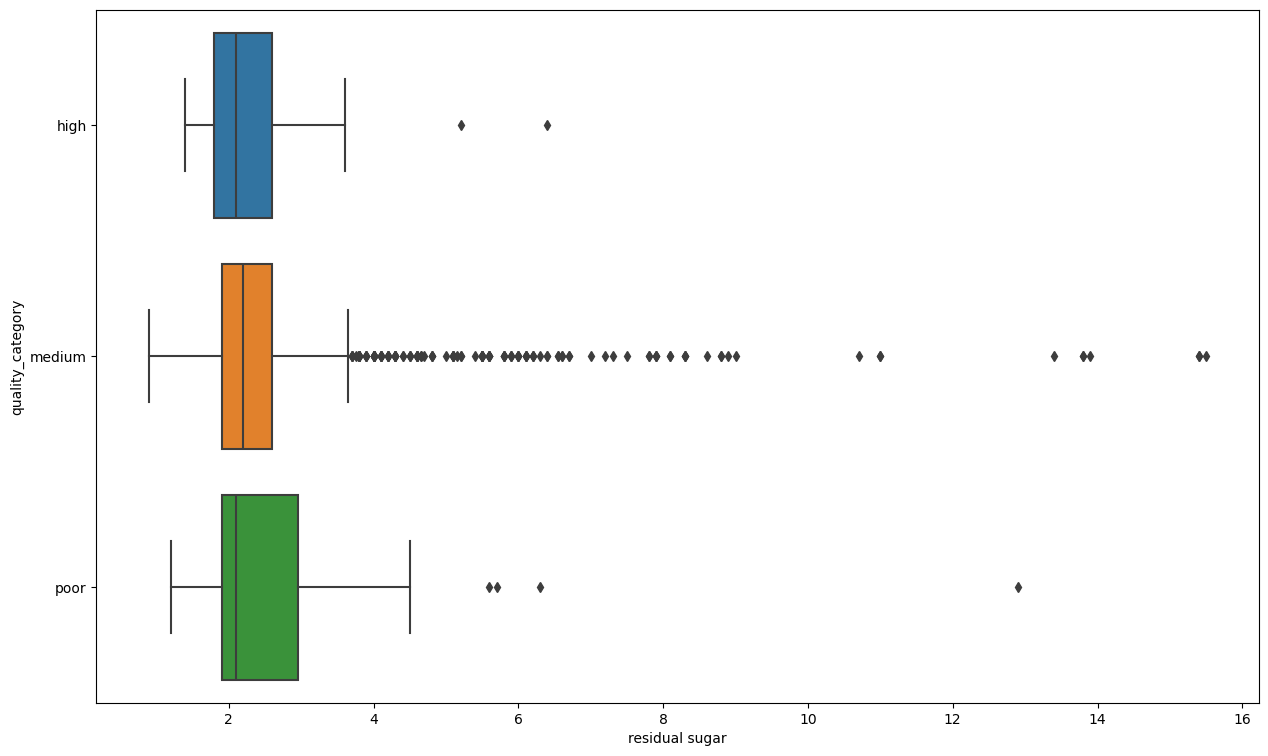

In [15]:
plt.figure(figsize=(15,9))
sns.boxplot(y = 'quality_category', x = 'residual sugar', data = data)
plt.show()

**Entrenar el modelo configurando los diferentes hiperparámetros**

In [16]:
predictors_col = ["fixed acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","density","pH","alcohol"]
target_col = ['quality']

In [17]:
predictors = data[predictors_col]
target = data[target_col]

In [18]:
print (predictors)

      fixed acidity  citric acid  residual sugar  chlorides  \
0               7.4         0.00             1.9      0.076   
1               7.8         0.00             2.6      0.098   
2               7.8         0.04             2.3      0.092   
3              11.2         0.56             1.9      0.075   
4               7.4         0.00             1.9      0.076   
...             ...          ...             ...        ...   
1594            6.2         0.08             2.0      0.090   
1595            5.9         0.10             2.2      0.062   
1596            6.3         0.13             2.3      0.076   
1597            5.9         0.12             2.0      0.075   
1598            6.0         0.47             3.6      0.067   

      free sulfur dioxide  density    pH  alcohol  
0                    11.0  0.99780  3.51      9.4  
1                    25.0  0.99680  3.20      9.8  
2                    15.0  0.99700  3.26      9.8  
3                    17.0  0.99800 

In [19]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [20]:
corr = predictors.corr()
corr

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,alcohol
fixed acidity,1.000000,0.671703,0.114777,0.093705,-0.153794,0.668047,-0.682978,-0.061668
citric acid,0.671703,1.000000,0.143577,0.203823,-0.060978,0.364947,-0.541904,0.109903
residual sugar,0.114777,0.143577,1.000000,0.055610,0.187049,0.355283,-0.085652,0.042075
chlorides,0.093705,0.203823,0.055610,1.000000,0.005562,0.200632,-0.265026,-0.221141
free sulfur dioxide,-0.153794,-0.060978,0.187049,0.005562,1.000000,-0.021946,0.070377,-0.069408
density,0.668047,0.364947,0.355283,0.200632,-0.021946,1.000000,-0.341699,-0.496180
pH,-0.682978,-0.541904,-0.085652,-0.265026,0.070377,-0.341699,1.000000,0.205633
alcohol,-0.061668,0.109903,0.042075,-0.221141,-0.069408,-0.496180,0.205633,1.000000


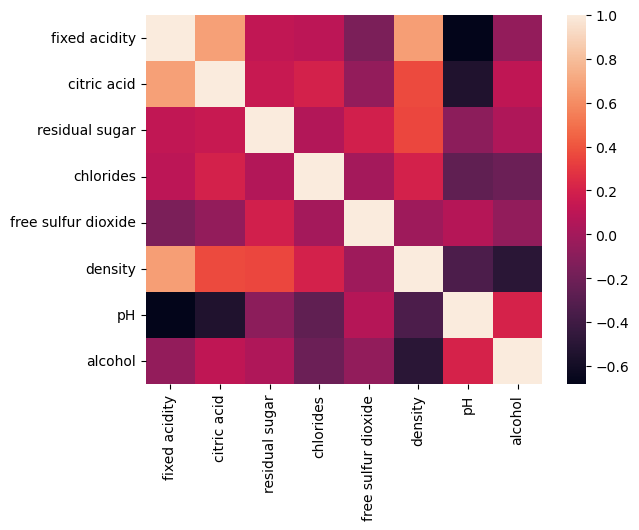

In [21]:
sns.heatmap(corr)
plt.show()

**Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [22]:
X_train, X_test, y_train, y_test, = train_test_split(predictors, target, test_size=0.3, random_state=13)

In [23]:
tree = DecisionTreeClassifier()

In [24]:
arbol = tree.fit(X_train, y_train)

[Text(0.6262324007438176, 0.9761904761904762, 'x[7] <= 10.525\ngini = 0.645\nsamples = 1119\nvalue = [8, 40, 470, 450, 140, 11]'),
 Text(0.4089683756761978, 0.9285714285714286, 'x[0] <= 9.95\ngini = 0.543\nsamples = 677\nvalue = [5, 26, 395, 228, 23, 0]'),
 Text(0.2901160403786708, 0.8809523809523809, 'x[7] <= 9.925\ngini = 0.516\nsamples = 573\nvalue = [4, 23, 358, 173, 15, 0]'),
 Text(0.174609978748068, 0.8333333333333334, 'x[0] <= 9.15\ngini = 0.459\nsamples = 410\nvalue = [2, 15, 281, 108, 4, 0]'),
 Text(0.10501593894899536, 0.7857142857142857, 'x[4] <= 33.5\ngini = 0.482\nsamples = 370\nvalue = [2, 14, 243, 108, 3, 0]'),
 Text(0.10192474884080371, 0.7380952380952381, 'x[7] <= 9.075\ngini = 0.503\nsamples = 342\nvalue = [2, 14, 215, 108, 3, 0]'),
 Text(0.037287480680061824, 0.6904761904761905, 'x[4] <= 15.0\ngini = 0.529\nsamples = 23\nvalue = [0, 2, 7, 14, 0, 0]'),
 Text(0.031105100463678516, 0.6428571428571429, 'x[0] <= 7.6\ngini = 0.388\nsamples = 17\nvalue = [0, 2, 2, 13, 0, 0]

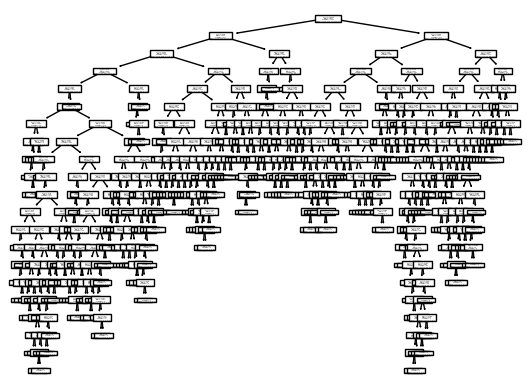

In [25]:
plot_tree(arbol)

**Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc**

In [26]:
predicciones = arbol.predict(X_test)

In [27]:
predicciones

array([7, 6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 5, 6, 7, 5, 6, 7, 5, 5, 5, 6,
       6, 5, 5, 7, 5, 5, 5, 7, 6, 6, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 6, 6,
       5, 4, 6, 7, 5, 6, 6, 5, 6, 5, 7, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6, 7,
       6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 4, 8, 6,
       6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 6, 8, 6, 6, 6, 5, 6, 7, 4, 5, 5, 5,
       5, 8, 6, 6, 5, 5, 6, 7, 6, 6, 5, 6, 5, 7, 5, 5, 5, 5, 6, 7, 6, 5,
       5, 7, 6, 6, 7, 5, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 6, 7, 5, 5,
       5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 7, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 8, 8,
       5, 5, 6, 6, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 7, 6, 6,
       5, 5, 6, 5, 7, 6, 7, 6, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 6, 5, 6, 8, 5,
       5, 7, 6, 7, 5, 5, 6, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5,
       6, 8, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,

**Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc**

In [28]:
#Examinamos la matriz de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,1,0,0
4,2,0,5,5,1,0
5,0,3,152,45,11,0
6,0,2,53,105,20,8
7,0,1,8,22,24,4
8,0,0,2,3,2,0


In [29]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5854166666666667

C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(0.98, 1.04694395)

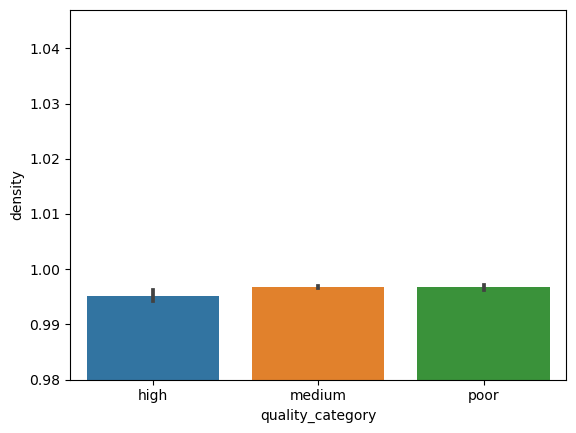

In [38]:
sns.barplot(data = data, y = "density", x = "quality_category")
plt.ylim(0.98)

C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(0.98, 1.0053817838249952)

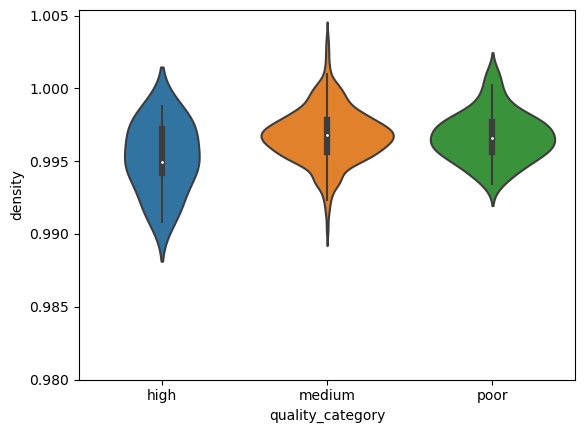

In [39]:
sns.violinplot(data = data, y = "density", x = "quality_category")
plt.ylim(0.98)

C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='quality_category', ylabel='alcohol'>

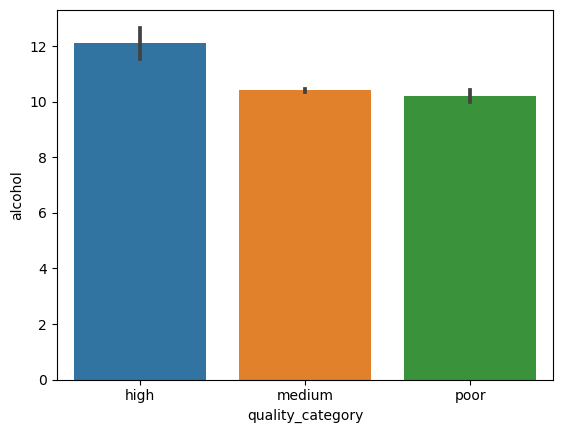

In [36]:
sns.barplot(data = data, y = "alcohol", x = "quality_category")

C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='quality_category', ylabel='alcohol'>

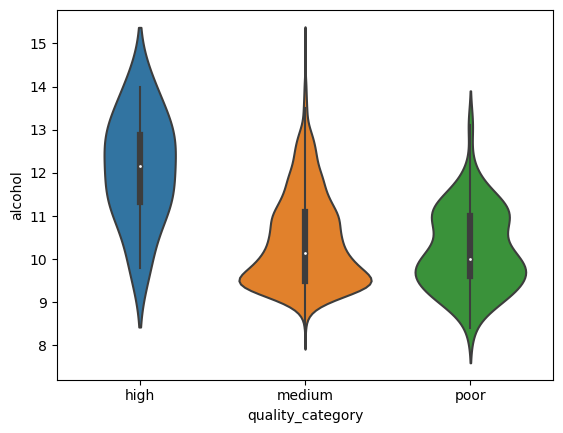

In [37]:
sns.violinplot(data = data, y = "alcohol", x = "quality_category")

C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='quality_category', ylabel='volatile acidity'>

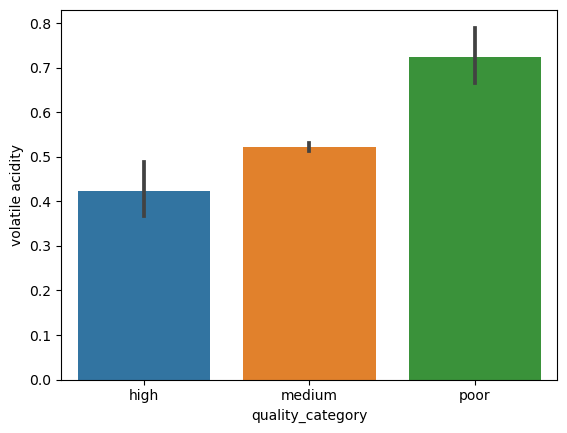

In [41]:
sns.barplot(data = data, y = "volatile acidity", x = "quality_category")

C:\Users\lausa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='quality_category', ylabel='volatile acidity'>

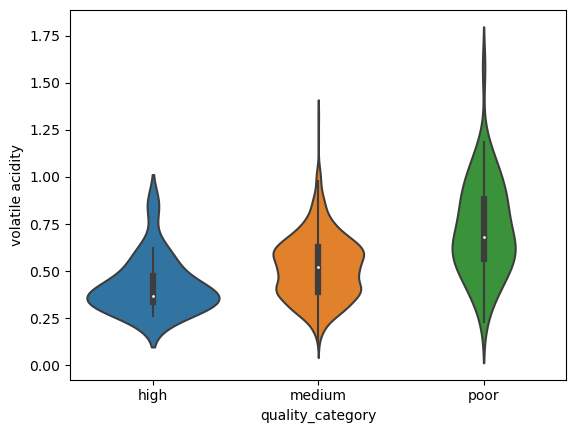

In [42]:
sns.violinplot(data = data, y = "volatile acidity", x = "quality_category")